In [3]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from datetime import datetime

In [5]:
path = r"C:\Users\henri\Desktop\Fotballanalyser\Datascouting\Legia Warshawa\zscores-europe-leagues-06-09-25.csv"
df=pd.read_csv(path)

In [7]:
df.head()

,Unnamed: 0,player,squad,club today,season,league,main position,position,age,market value,...,raw_passes to penalty area per 90,"raw_accurate passes to penalty area, %",raw_through passes per 90,"raw_accurate through passes, %",raw_deep completions per 90,raw_deep completed crosses per 90,raw_progressive passes per 90,"raw_accurate progressive passes, %",raw_xg per box touch,raw_xg per shot
0,1264,A. Danko,Podbrezová,Podbrezová,2024-25,Slovakia Super Liga 2024-25,GK,GK,21,0,...,0.31,27.27,0.39,50.00,0.11,0.00,7.80,71.07,NaN,NaN
1,1265,M. Junas,Skalica,Skalica,2024-25,Slovakia Super Liga 2024-25,GK,GK,29,250000,...,0.12,0.00,0.09,66.67,0.03,0.00,7.63,86.42,0.166667,0.333333
2,1266,K. Koštrna,Podbrezová,Podbrezová,2024-25,Slovakia Super Liga 2024-25,CB,"CB, RCB",31,350000,...,1.32,46.67,0.35,58.33,0.35,0.38,9.99,74.78,0.042553,0.111111
3,1267,D. Taraduda,Zemplín Michalovce,Zemplín Michalovce,2024-25,Slovakia Super Liga 2024-25,RB,"RB, RCB, LCB",24,150000,...,1.37,31.11,0.15,60.00,0.31,0.18,6.66,61.93,0.082192,0.139535
4,1268,M. Faško,FC Košice,FC Košice,2024-25,Slovakia Super Liga 2024-25,RCMF,"RCMF, CF, LCMF",30,300000,...,3.96,55.81,1.01,27.27,1.53,0.95,7.03,80.35,0.140496,0.138776


In [15]:
df.league.unique()

array(['Slovakia Super Liga 2024-25', 'Greece Super League 2024-25',
       'Netherlands Eerste Divisie 2024-25', 'Sweden Allsvenskan 2025',
       'Croatia 1.HNL 2024-25', 'Belgium First Division B 2024-25',
       'Switzerland Super League 2024-25', 'France Ligue 2 2024-25',
       'Finland Veikkausliiga 2025', 'Japan J1-League 2025',
       'Denmark Superliga 2024-25', 'Czech Fortuna Liga 2024-25',
       'Austria Bundesliga 2024-25', 'Germany 2. Bundesliga 2024-25',
       'Poland Ekstraklasa 2024-25', 'Poland 1 Liga 2024-25',
       'Spain Segunda 2024-25', 'Italy Serie B 2024-25',
       'Belgium First Division A 2024-25', 'Slovenia Prva Liga 2024-25',
       'Serbia Super Liga 2024-25'], dtype=object)

In [9]:
pd.set_option('display.max_columns', None)

In [9]:
col_list = df.columns.to_list()
print(col_list) #print columns

['Unnamed: 0', 'player', 'squad', 'club today', 'season', 'league', 'main position', 'position', 'age', 'market value', 'contract months left', 'matches played', 'minutes played', 'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'position_group', 'goals', 'xg', 'assists', 'xa', 'duels per 90', 'duels won, %', 'successful defensive actions per 90', 'defensive duels per 90', 'defensive duels won, %', 'aerial duels per 90', 'aerial duels won, %', 'sliding tackles per 90', 'padj sliding tackles', 'shots blocked per 90', 'interceptions per 90', 'padj interceptions', 'fouls per 90', 'yellow cards', 'yellow cards per 90', 'red cards', 'red cards per 90', 'successful attacking actions per 90', 'goals per 90', 'non-penalty goals', 'non-penalty goals per 90', 'xg per 90', 'head goals', 'head goals per 90', 'shots', 'shots per 90', 'shots on target, %', 'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %', 'crosses from left flank per 90', 'ac

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Columns: 186 entries, Unnamed: 0 to raw_xg per shot
dtypes: float64(159), int64(15), object(12)
memory usage: 8.0+ MB


In [17]:
len(df)

5624

In [19]:
df['main position'].unique()

array(['GK', 'CB', 'RB', 'RCMF', 'DMF', 'LCMF', 'RCB', 'CF', 'LCB',
       'RAMF', 'LB', 'LWB', 'LWF', 'RWB', 'AMF', 'RW', 'LW', 'RDMF',
       'LAMF', 'LDMF', 'RWF'], dtype=object)

In [21]:
df.dtypes # raw is per 90, normal metric-name is z-scores

Unnamed: 0                                    int64
player                                       object
squad                                        object
club today                                   object
season                                       object
league                                       object
main position                                object
position                                     object
age                                           int64
market value                                  int64
contract months left                          int64
matches played                                int64
minutes played                                int64
birth country                                object
passport country                             object
foot                                         object
height                                        int64
weight                                        int64
on loan                                      object
position_gro

In [13]:
df.league.unique()

array(['Slovakia Super Liga 2024-25', 'Greece Super League 2024-25',
       'Netherlands Eerste Divisie 2024-25', 'Sweden Allsvenskan 2025',
       'Croatia 1.HNL 2024-25', 'Belgium First Division B 2024-25',
       'Switzerland Super League 2024-25', 'France Ligue 2 2024-25',
       'Finland Veikkausliiga 2025', 'Japan J1-League 2025',
       'Denmark Superliga 2024-25', 'Czech Fortuna Liga 2024-25',
       'Austria Bundesliga 2024-25', 'Germany 2. Bundesliga 2024-25',
       'Poland Ekstraklasa 2024-25', 'Poland 1 Liga 2024-25',
       'Spain Segunda 2024-25', 'Italy Serie B 2024-25',
       'Belgium First Division A 2024-25', 'Slovenia Prva Liga 2024-25',
       'Serbia Super Liga 2024-25'], dtype=object)

In [15]:
class Preprocessing:
    def __init__(self, df, leagues=None,position_group=None, min_minutes=None):
        self.df = df
        self.leagues = leagues 
        self.position_group=position_group 
        self.min_minutes = min_minutes if min_minutes is not None else 0
        self.filtered_df = None

    def filter_data(self):
        """Filtrerer DataFrame basert på angitte kriterier."""
        df = self.df.copy()

        # Endre kolonnenavn
        #df = df.rename(columns={'Team within selected timeframe': 'squad'})
        #df = df.rename(columns={'Team': 'club today'})
        df.columns = df.columns.str.lower()
        # Filtrer basert på liga(er)
        df = df[df['league'].isin(self.leagues)]
        df = df[df['position_group'].isin(self.position_group)]

        # Liste over relevante kolonner
        columns_to_keep = ['player', 'squad', 'club today', 'season', 'league', 'main position', 'position', 'age', 'market value', 'contract months left', 'matches played', 'minutes played', 
          'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'position_group', 'raw_goals', 'raw_xg', 'raw_assists', 'raw_xa', 'raw_duels per 90', 'raw_duels won, %', 
                           'raw_successful defensive actions per 90', 'raw_defensive duels per 90', 'raw_defensive duels won, %', 'raw_aerial duels per 90', 'raw_aerial duels won, %', 'raw_sliding tackles per 90',
                           'raw_padj sliding tackles', 'raw_shots blocked per 90', 'raw_interceptions per 90', 'raw_padj interceptions', 'raw_fouls per 90', 'raw_yellow cards', 'raw_yellow cards per 90', 'raw_red cards', 
                           'raw_red cards per 90', 'raw_successful attacking actions per 90', 'raw_goals per 90', 'raw_non-penalty goals', 'raw_non-penalty goals per 90', 'raw_xg per 90', 'raw_head goals', 
                           'raw_head goals per 90', 'raw_shots', 'raw_shots per 90', 'raw_shots on target, %', 'raw_goal conversion, %', 'raw_assists per 90', 'raw_crosses per 90', 'raw_accurate crosses, %', 
                           'raw_crosses from left flank per 90', 'raw_accurate crosses from left flank, %', 'raw_crosses from right flank per 90', 'raw_accurate crosses from right flank, %', 
                           'raw_crosses to goalie box per 90', 'raw_dribbles per 90', 'raw_successful dribbles, %', 'raw_offensive duels per 90', 'raw_offensive duels won, %', 'raw_touches in box per 90', 
                           'raw_progressive runs per 90', 'raw_accelerations per 90', 'raw_received passes per 90', 'raw_received long passes per 90', 'raw_fouls suffered per 90', 'raw_passes per 90', 
                           'raw_accurate passes, %', 'raw_forward passes per 90', 'raw_accurate forward passes, %', 'raw_back passes per 90', 'raw_accurate back passes, %', 'raw_lateral passes per 90', 
                           'raw_accurate lateral passes, %', 'raw_short / medium passes per 90', 'raw_accurate short / medium passes, %', 'raw_long passes per 90', 'raw_accurate long passes, %', 
                           'raw_average pass length, m', 'raw_average long pass length, m', 'raw_xa per 90', 'raw_shot assists per 90', 'raw_second assists per 90', 'raw_third assists per 90', 
                           'raw_smart passes per 90', 'raw_accurate smart passes, %', 'raw_key passes per 90', 'raw_passes to final third per 90', 'raw_accurate passes to final third, %', 
                           'raw_passes to penalty area per 90', 'raw_accurate passes to penalty area, %', 'raw_through passes per 90', 'raw_accurate through passes, %', 'raw_deep completions per 90', 
                           'raw_deep completed crosses per 90', 'raw_progressive passes per 90', 'raw_accurate progressive passes, %','raw_xg per box touch', 'raw_xg per shot',
        ]
        
        # Behold kun relevante kolonner
        columns_available = [col for col in columns_to_keep if col in df.columns]
        df = df[columns_available]  
        #df["age"] = pd.to_numeric(df["age"], errors="coerce").astype("Int64")
        # Filtrer basert på minimum minutter spilt
        df = df[df['minutes played'] > self.min_minutes]

        self.filtered_df = df
        return self.filtered_df

leagues=[
'Slovakia Super Liga 2024-25', 'Greece Super League 2024-25',
       'Netherlands Eerste Divisie 2024-25', 
       'Croatia 1.HNL 2024-25', 'Belgium First Division B 2024-25',
       'Switzerland Super League 2024-25', 'France Ligue 2 2024-25',
       'Japan J1-League 2025','Denmark Superliga 2024-25', 'Czech Fortuna Liga 2024-25',
       'Austria Bundesliga 2024-25', 'Germany 2. Bundesliga 2024-25',
       'Poland Ekstraklasa 2024-25', 'Poland 1 Liga 2024-25',
       'Spain Segunda 2024-25', 'Italy Serie B 2024-25',
       'Belgium First Division A 2024-25', 'Slovenia Prva Liga 2024-25',
       'Serbia Super Liga 2024-25'
]
#leagues = ['Spain La Liga 2024-25', 'Italy Serie A 2024-25', 'France Ligue 1 2024-25', 'Germany Bundesliga 2024-25', 'England Premier League 2024-25']
position_group=['Striker'] # can be adjusted
min_minutes=900  # can be adjusted

preprocessor = Preprocessing(
    df=df, 
    leagues=leagues, 
    position_group=position_group, 
    min_minutes=min_minutes
)
filtered_df = preprocessor.filter_data()

In [17]:
filtered_df.position_group.unique()

array(['Striker'], dtype=object)

In [19]:
len(filtered_df)

714

In [17]:
filtered_df.squad.unique()

array(['Dukla Banská Bystrica', 'Podbrezová', 'DAC', 'Slovan Bratislava',
       'Spartak Trnava', 'FC Košice', 'Komárno', 'Ružomberok', 'Žilina',
       'Zemplín Michalovce', 'Skalica', 'Trenčín', 'Panserraikos', 'Aris',
       'Olympiacos Piraeus', 'Atromitos', 'Lamia', 'Levadiakos',
       'Asteras Tripolis', 'Panathinaikos', 'AEK Athens',
       'Athens Kallithea', 'Volos NFC', 'OFI', 'Panetolikos FC', 'PAOK',
       'Cambuur', 'ADO Den Haag', 'Volendam', 'TOP Oss', 'Dordrecht',
       'Telstar', 'PSV II', 'Roda JC', 'MVV', 'Helmond Sport',
       'De Graafschap', 'Den Bosch', 'Ajax II', 'Excelsior', 'Eindhoven',
       'Utrecht II', 'VVV Venlo', 'Emmen', 'Vitesse', 'AZ II',
       'Hajduk Split', 'Rijeka', 'Šibenik', 'Osijek', 'Dinamo Zagreb',
       'Varaždin', 'Slaven Belupo', 'Istra 1961', 'Lokomotiva Zagreb',
       'Gorica', 'Lommel SK', 'Francs Borains', 'Eupen', 'RWD Molenbeek',
       'Patro Eisden', 'Lokeren-Temse', 'La Louvière', 'Zulte-Waregem',
       'Genk II', 'Liers

In [19]:
len(filtered_df.squad.unique())

298

In [21]:
filtered_df['player'].duplicated().sum()

3

In [21]:
filtered_df = filtered_df.drop_duplicates(subset=['player','squad','league'], keep='first') # remove duplicate rows, keep same players at different club

In [65]:
col_list = filtered_df.columns.to_list()
print(col_list) #print the columns 

['player', 'squad', 'club today', 'season', 'league', 'main position', 'position', 'age', 'market value', 'contract months left', 'matches played', 'minutes played', 'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'position_group', 'raw_goals', 'raw_xg', 'raw_assists', 'raw_xa', 'raw_duels per 90', 'raw_duels won, %', 'raw_successful defensive actions per 90', 'raw_defensive duels per 90', 'raw_defensive duels won, %', 'raw_aerial duels per 90', 'raw_aerial duels won, %', 'raw_sliding tackles per 90', 'raw_padj sliding tackles', 'raw_shots blocked per 90', 'raw_interceptions per 90', 'raw_padj interceptions', 'raw_fouls per 90', 'raw_yellow cards', 'raw_yellow cards per 90', 'raw_red cards', 'raw_red cards per 90', 'raw_successful attacking actions per 90', 'raw_goals per 90', 'raw_non-penalty goals', 'raw_non-penalty goals per 90', 'raw_xg per 90', 'raw_head goals', 'raw_head goals per 90', 'raw_shots', 'raw_shots per 90', 'raw_shots on target, %', 'raw_goa

In [23]:
#adding new metric o/u performance g-xg
filtered_df['raw_o/u_performance_goals_xg']=filtered_df['raw_goals per 90']/filtered_df['raw_xg per 90'] # new metric - over/under performance goals minus xg
new_cols = ['raw_o/u_performance_goals_xg']
filtered_df[new_cols] = filtered_df[new_cols].round(2)

C:\Users\henri\AppData\Local\Temp\ipykernel_46732\2015119042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['raw_o/u_performance_goals_xg']=filtered_df['raw_goals per 90']/filtered_df['raw_xg per 90']


In [27]:
filtered_df.head()

,player,squad,club today,season,league,main position,position,age,market value,contract months left,matches played,minutes played,birth country,passport country,foot,height,weight,on loan,position_group,raw_goals,raw_xg,raw_assists,raw_xa,raw_duels per 90,"raw_duels won, %",raw_successful defensive actions per 90,raw_defensive duels per 90,"raw_defensive duels won, %",raw_aerial duels per 90,"raw_aerial duels won, %",raw_sliding tackles per 90,raw_padj sliding tackles,raw_shots blocked per 90,raw_interceptions per 90,raw_padj interceptions,raw_fouls per 90,raw_yellow cards,raw_yellow cards per 90,raw_red cards,raw_red cards per 90,raw_successful attacking actions per 90,raw_goals per 90,raw_non-penalty goals,raw_non-penalty goals per 90,raw_xg per 90,raw_head goals,raw_head goals per 90,raw_shots,raw_shots per 90,"raw_shots on target, %","raw_goal conversion, %",raw_assists per 90,raw_crosses per 90,"raw_accurate crosses, %",raw_crosses from left flank per 90,"raw_accurate crosses from left flank, %",raw_crosses from right flank per 90,"raw_accurate crosses from right flank, %",raw_crosses to goalie box per 90,raw_dribbles per 90,"raw_successful dribbles, %",raw_offensive duels per 90,"raw_offensive duels won, %",raw_touches in box per 90,raw_progressive runs per 90,raw_accelerations per 90,raw_received passes per 90,raw_received long passes per 90,raw_fouls suffered per 90,raw_passes per 90,"raw_accurate passes, %",raw_forward passes per 90,"raw_accurate forward passes, %",raw_back passes per 90,"raw_accurate back passes, %",raw_lateral passes per 90,"raw_accurate lateral passes, %",raw_short / medium passes per 90,"raw_accurate short / medium passes, %",raw_long passes per 90,"raw_accurate long passes, %","raw_average pass length, m","raw_average long pass length, m",raw_xa per 90,raw_shot assists per 90,raw_second assists per 90,raw_third assists per 90,raw_smart passes per 90,"raw_accurate smart passes, %",raw_key passes per 90,raw_passes to final third per 90,"raw_accurate passes to final third, %",raw_passes to penalty area per 90,"raw_accurate passes to penalty area, %",raw_through passes per 90,"raw_accurate through passes, %",raw_deep completions per 90,raw_deep completed crosses per 90,raw_progressive passes per 90,"raw_accurate progressive passes, %",raw_xg per box touch,raw_xg per shot,raw_o/u_performance_goals_xg
11,M. Rymarenko,Dukla Banská Bystrica,Dukla Banská Bystrica,2024-25,Slovakia Super Liga 2024-25,CF,CF,26,600000,9,31,2798,Slovakia,Slovakia,right,178,75,no,Striker,13,11.53,4,5.91,18.40,35.66,2.73,2.89,64.44,2.41,21.33,0.06,0.08,0.00,0.80,1.01,0.68,6,0.19,0,0.0,3.35,0.42,9,0.29,0.37,1,0.03,93,2.99,35.48,13.978,0.13,1.48,43.48,1.00,32.26,0.48,66.67,0.32,3.83,41.18,11.00,31.87,3.02,2.12,0.55,17.11,1.70,1.64,23.90,76.99,6.34,64.47,6.30,91.33,6.63,81.55,21.23,80.15,1.25,61.54,16.67,25.45,0.19,1.25,0.06,0.00,0.19,33.33,0.39,3.15,66.33,2.06,50.00,0.42,30.77,0.80,0.61,2.93,78.02,0.122517,0.123746,1.135135
22,A. Yirajang,Podbrezová,Podbrezová,2024-25,Slovakia Super Liga 2024-25,CF,"CF, LWF",20,0,57,33,2652,Gambia,Gambia,NaN,0,0,no,Striker,9,8.03,4,3.97,20.50,42.88,4.34,4.17,59.35,2.71,36.25,0.03,0.05,0.14,1.83,2.54,0.68,1,0.03,0,0.0,4.41,0.31,9,0.31,0.27,2,0.07,66,2.24,45.45,13.636,0.14,1.97,34.48,1.76,36.54,0.10,33.33,0.31,4.55,58.21,11.61,40.06,4.07,3.29,0.34,15.44,2.82,1.56,20.87,75.28,4.48,62.88,6.01,91.53,6.04,74.16,18.02,81.17,0.95,46.43,16.96,19.74,0.13,0.95,0.07,0.00,0.14,50.00,0.61,1.56,56.52,2.61,57.14,0.20,33.33,1.26,0.71,3.39,76.00,0.066339,0.120536,1.148148
36,D. Smékal,Podbrezová,Podbrezová,2024-25,Slovakia Super Liga 2024-25,CF,CF,23,0,21,31,2441,Czech Republic,Czech Republic,right,193,81,no,Striker,8,6.64,5,2.92,20.24,37.89,4.42,4.20,59.65,6.27,38.82,0.04,0.05,0.22,1.88,2.62,2.03,3,0.11,0,0.0,1.66,0.29,8,0.29,0.24,3,0.11,35,1.29,51.43,22.857,0.18,1.11,20.00,0.37,20.00,0.63,17.65,0.11,1.36,56.76,6.67,32.04,3.76,1.14,0.22,8.96,1.51,0.74,14.56,70.63,3.13,64.71,3.98,85.19,3.72,68.32,13.05,75.99,0.44,3

In [27]:
# normalize the data to a [0, 1] range
def NormalizeData(data):
    # Subtract the minimum value from each element and divide by the range
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#create a copy of the dataframe
filtered_df = filtered_df.copy()

# columns to exclude
exclude_columns = ['player', 'squad', 'club today', 'season', 'league', 'main position', 'position', 'age', 'market value', 'contract months left', 
                   'matches played', 'minutes played', 'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'position_group'
]

# Find numerical columns
columns_to_rating = [
    col for col in filtered_df.columns
    if col not in exclude_columns and filtered_df[col].dtype in ['int64', 'float64']
]


# Iterate over the specified columns (columns_to_rating) to normalize them
for column in columns_to_rating:
    # Step 1: Shift the values in the column to ensure no negative values
    filtered_df[column] = filtered_df[column] + abs(filtered_df[column].min())
    
    # Step 2: Normalize the column to a [0, 1] range
    filtered_df[column] = NormalizeData(filtered_df[column])

In [29]:
col_list = filtered_df.columns.to_list()
print(col_list) #print the columns 

['player', 'squad', 'club today', 'season', 'league', 'main position', 'position', 'age', 'market value', 'contract months left', 'matches played', 'minutes played', 'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'position_group', 'raw_goals', 'raw_xg', 'raw_assists', 'raw_xa', 'raw_duels per 90', 'raw_duels won, %', 'raw_successful defensive actions per 90', 'raw_defensive duels per 90', 'raw_defensive duels won, %', 'raw_aerial duels per 90', 'raw_aerial duels won, %', 'raw_sliding tackles per 90', 'raw_padj sliding tackles', 'raw_shots blocked per 90', 'raw_interceptions per 90', 'raw_padj interceptions', 'raw_fouls per 90', 'raw_yellow cards', 'raw_yellow cards per 90', 'raw_red cards', 'raw_red cards per 90', 'raw_successful attacking actions per 90', 'raw_goals per 90', 'raw_non-penalty goals', 'raw_non-penalty goals per 90', 'raw_xg per 90', 'raw_head goals', 'raw_head goals per 90', 'raw_shots', 'raw_shots per 90', 'raw_shots on target, %', 'raw_goa

In [31]:
# creating main attributes for striker role
new_columns = {
    # carry_att
    'progressiverun_rating': filtered_df['raw_progressive runs per 90'] * 1.0,
    'carry_att': filtered_df['raw_progressive runs per 90'] * 1.0,

    # dribble_att
    'dribbles_rating': filtered_df['raw_dribbles per 90'] * 0.8,
    'dribbling_success_rating': filtered_df['raw_successful dribbles, %'] * 0.2,
    'dribble_att': filtered_df['raw_successful dribbles, %'] * 0.2 + filtered_df['raw_dribbles per 90'] * 0.8,

    # hold_up_play_att
    'long_passes_receive_rating': filtered_df['raw_received long passes per 90'] * 0.8, 
    'Aerial_won%_rating': filtered_df['raw_aerial duels won, %'] * 0.2,
    'hold_up_play_att': (
        filtered_df['raw_received long passes per 90'] * 0.8 +
        filtered_df['raw_aerial duels won, %'] * 0.2
    ),

    # finding_chances_att
    'shots_rating': filtered_df['raw_shots per 90'] * 0.25, 
    'xG_rating': filtered_df['raw_xg per 90'] * 0.3, 
    'xg_per_box touch':filtered_df['raw_xg per box touch']*0.2, 
    'xg_per shot_rating':filtered_df['raw_xg per shot']*0.25,
    'finding_chances_att':(filtered_df['raw_shots per 90'] * 0.25 + filtered_df['raw_xg per 90'] * 0.3 + filtered_df['raw_xg per box touch']*0.2+filtered_df['raw_xg per shot']*0.25),
    
    # shot_efficiency_att
    'o_u-performance':filtered_df['raw_o/u_performance_goals_xg']*0.2,
    'Non_penalty_goals_rating': filtered_df['raw_non-penalty goals per 90'] * 0.4,
    'goal_conversion_rating': filtered_df['raw_goal conversion, %'] * 0.4,
    'shot_efficiency_att': (filtered_df['raw_o/u_performance_goals_xg']*0.2 + filtered_df['raw_non-penalty goals per 90'] * 0.4 + filtered_df['raw_goal conversion, %'] * 0.4),


    # assisting_chances_att
    'passes_to_penaltyarea_rating': filtered_df['raw_passes to penalty area per 90'] * 0.2,
    'expected_assist_rating': filtered_df['raw_xa per 90'] * 0.3,
    'Through balls': filtered_df['raw_through passes per 90'] * 0.2,
    'Key_passes rating': filtered_df['raw_key passes per 90'] * 0.3,
    'assisting_chances_att': (
        filtered_df['raw_passes to penalty area per 90'] * 0.2 +
        filtered_df['raw_xa per 90'] * 0.3 +
        filtered_df['raw_through passes per 90'] * 0.2 +
        filtered_df['raw_key passes per 90'] * 0.3
    ),
    # defensive_att
    'DefensiveDuelRating': filtered_df['raw_defensive duels per 90'] * 0.3,
    'DefensiveDuelsWonRating': filtered_df['raw_defensive duels won, %'] * 0.3,
    'interceptions_rating': filtered_df['raw_padj interceptions'] * 0.4,
    'defensive_att': (
        filtered_df['raw_defensive duels per 90'] * 0.3 +
        filtered_df['raw_defensive duels won, %'] * 0.3 +
        filtered_df['raw_padj interceptions'] * 0.4
    ),

    # Risk rating — antar at risk_taking og risk_efficiency allerede er laget med raw_ innhold
    #'poaching_rating': risk_taking*0.8 + 0.2 * risk_efficiency,
}

# Legg til alle nye kolonner i DataFrame
filtered_df = pd.concat([filtered_df, pd.DataFrame(new_columns)], axis=1)

# Optional: Kopi for å defragmentere DataFrame
filtered_df = filtered_df.copy()

In [33]:
# Creating the new DataFrame 'ratings' with the specified columns
ratings_columns = [
    "player", "squad","age", "market value","minutes played", 'contract months left','league',
    "carry_att","dribble_att","hold_up_play_att", "finding_chances_att", "shot_efficiency_att", "assisting_chances_att", "defensive_att"]

ratings = filtered_df[ratings_columns].copy()

In [37]:
ratings.head()

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att
11,M. Rymarenko,Dukla Banská Bystrica,26,600000,2798,9,Slovakia Super Liga 2024-25,0.487356,0.405556,0.324330,0.387748,0.323944,0.379817,0.305663
22,A. Yirajang,Podbrezová,20,0,2652,57,Slovakia Super Liga 2024-25,0.756322,0.503545,0.590469,0.264912,0.330497,0.372605,0.445379
36,D. Smékal,Podbrezová,23,0,2441,21,Slovakia Super Liga 2024-25,0.262069,0.217405,0.347982,0.260891,0.400424,0.269330,0.454349
51,M. Trusa,DAC,24,1000000,2247,21,Slovakia Super Liga 2024-25,0.404598,0.321098,0.475294,0.520985,0.309702,0.142350,0.506108
56,D. Strelec,Slovan Bratislava,24,2800000,2200,33,Slovakia Super Liga 2024-25,0.422989,0.262387,0.256929,0.454480,0.721077,0.459107,0.296701


In [35]:
ratings.columns

Index(['player', 'squad', 'age', 'market value', 'minutes played',
       'contract months left', 'league', 'carry_att', 'dribble_att',
       'hold_up_play_att', 'finding_chances_att', 'shot_efficiency_att',
       'assisting_chances_att', 'defensive_att'],
      dtype='object')

In [39]:
# Function to normalize the data to a [0, 1] range
def NormalizeData(data):
    # Subtract the minimum value from each element and divide by the range
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Ensure a copy of the DataFrame to prevent unintended changes to the original data
ratings = ratings.copy()

# Get the column names from the 7th column onwards
columns_to_normalize = ratings.columns[7:]  # Index starts at 0, so 5 corresponds to the 6th column

# Iterate over the selected columns and apply normalization
for column in columns_to_normalize:
    # Step 1: Shift values to ensure no negative numbers
    ratings[column] = ratings[column] + abs(ratings[column].min())
    
    # Step 2: Normalize the column to a [0, 1] range
    ratings[column] = NormalizeData(ratings[column])

In [41]:
ratings.columns

Index(['player', 'squad', 'age', 'market value', 'minutes played',
       'contract months left', 'league', 'carry_att', 'dribble_att',
       'hold_up_play_att', 'finding_chances_att', 'shot_efficiency_att',
       'assisting_chances_att', 'defensive_att'],
      dtype='object')

In [43]:
ratings = ratings.loc[:, ~ratings.columns.duplicated(keep='last')]

In [45]:
# Weight the overall attributes in terms of importance 
ratings["Carry Progression"] = ratings["carry_att"] *0.1
ratings["Dribbling"] = ratings["dribble_att"] *0.15
ratings["Hold Up Play"] = ratings["hold_up_play_att"] *0.05
ratings["Finding Chances"] = ratings["finding_chances_att"] *0.25
ratings["Assisting Chances"] = ratings["assisting_chances_att"] *0.3
ratings["Defensive Contribution"] = ratings["defensive_att"] *0.05
#ratings["Aerial"] = ratings["aerial_att"] *0.025
ratings["Shot Efficiency"] = ratings["shot_efficiency_att"] *0.1

# Adding the main attributes
ratings['Raw Total Score'] = (
    ratings['Carry Progression'] +
    ratings['Dribbling'] +
    ratings['Hold Up Play'] +
    ratings['Finding Chances'] +
    ratings['Assisting Chances'] +
    ratings['Defensive Contribution'] +
    ratings['Shot Efficiency']
)

In [47]:
ratings.head()

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score
11,M. Rymarenko,Dukla Banská Bystrica,26,600000,2798,9,Slovakia Super Liga 2024-25,0.487356,0.458132,0.305155,0.424769,0.416777,0.430319,0.320822,0.048736,0.068720,0.015258,0.106192,0.129096,0.016041,0.041678,0.425720
22,A. Yirajang,Podbrezová,20,0,2652,57,Slovakia Super Liga 2024-25,0.756322,0.568824,0.597826,0.264236,0.425208,0.422041,0.552480,0.075632,0.085324,0.029891,0.066059,0.126612,0.027624,0.042521,0.453663
36,D. Smékal,Podbrezová,23,0,2441,21,Slovakia Super Liga 2024-25,0.262069,0.245588,0.331165,0.258982,0.515174,0.303503,0.567354,0.026207,0.036838,0.016558,0.064745,0.091051,0.028368,0.051517,0.315285
51,M. Trusa,DAC,24,1000000,2247,21,Slovakia Super Liga 2024-25,0.404598,0.362724,0.471168,0.598895,0.398453,0.157756,0.653173,0.040460,0.054409,0.023558,0.149724,0.047327,0.032659,0.039845,0.387981
56,D. Strelec,Slovan Bratislava,24,2800000,2200,33,Slovakia Super Liga 2024-25,0.422989,0.296402,0.231034,0.511981,0.927718,0.521328,0.305963,0.042299,0.044460,0.011552,0.127995,0.156398,0.015298,0.092772,0.490774


In [49]:
ratings.columns

Index(['player', 'squad', 'age', 'market value', 'minutes played',
       'contract months left', 'league', 'carry_att', 'dribble_att',
       'hold_up_play_att', 'finding_chances_att', 'shot_efficiency_att',
       'assisting_chances_att', 'defensive_att', 'Carry Progression',
       'Dribbling', 'Hold Up Play', 'Finding Chances', 'Assisting Chances',
       'Defensive Contribution', 'Shot Efficiency', 'Raw Total Score'],
      dtype='object')

In [55]:
ratings.league.unique()

array(['Slovakia Super Liga 2024-25', 'Greece Super League 2024-25',
       'Netherlands Eerste Divisie 2024-25', 'Croatia 1.HNL 2024-25',
       'Belgium First Division B 2024-25',
       'Switzerland Super League 2024-25', 'France Ligue 2 2024-25',
       'Japan J1-League 2025', 'Denmark Superliga 2024-25',
       'Czech Fortuna Liga 2024-25', 'Austria Bundesliga 2024-25',
       'Germany 2. Bundesliga 2024-25', 'Poland Ekstraklasa 2024-25',
       'Poland 1 Liga 2024-25', 'Spain Segunda 2024-25',
       'Italy Serie B 2024-25', 'Belgium First Division A 2024-25',
       'Slovenia Prva Liga 2024-25', 'Serbia Super Liga 2024-25'],
      dtype=object)

In [93]:
ratings.head()

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score,raw_total_z-score,Final Rating
1,R. Florucz,Olimpija,23,700000,2042,32,Slovenia Prva Liga 2024-25,0.689655,0.966627,0.435584,0.605701,0.700085,0.667385,0.449700,0.068966,0.144994,0.021779,0.151425,0.200215,0.022485,0.070009,0.679873,4.299452,100.00
2,K. Vanrafelghem,Patro Eisden,21,0,1194,33,Belgium First Division B 2024-25,0.797701,1.000000,0.471926,0.564627,0.632282,0.559601,0.428512,0.079770,0.150000,0.023596,0.141157,0.167880,0.021426,0.063228,0.647057,3.887945,95.12
3,E. Kroupi,Lorient,18,0,2039,57,France Ligue 2 2024-25,0.354023,0.374843,0.465785,0.829401,0.913400,0.343641,0.340149,0.035402,0.056226,0.023289,0.207350,0.103092,0.017007,0.091340,0.533708,2.466529,75.98
4,M. Kireev,Lierse Kempenzonen,20,0,1330,21,Belgium First Division B 2024-25,0.949425,0.824896,0.348189,0.265667,0.338053,0.552552,0.879497,0.094943,0.123734,0.017409,0.066417,0.165766,0.043975,0.033805,0.546049,2.621285,75.90
5,Z. Jones,FC Košice,24,200000,1109,0,Slovakia Super Liga 2024-25,0.616092,0.841227,0.529285,0.369794,0.405024,0.534347,0.798260,0.061609,0.126184,0.026464,0.092449,0.160304,0.039913,0.040502,0.547426,2.638551,74.18


In [55]:
len(ratings)

713

In [53]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 11 to 5883
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  713 non-null    object 
 1   squad                   713 non-null    object 
 2   age                     713 non-null    int64  
 3   market value            713 non-null    int64  
 4   minutes played          713 non-null    int64  
 5   contract months left    713 non-null    int64  
 6   league                  713 non-null    object 
 7   carry_att               713 non-null    float64
 8   dribble_att             713 non-null    float64
 9   hold_up_play_att        713 non-null    float64
 10  finding_chances_att     713 non-null    float64
 11  shot_efficiency_att     713 non-null    float64
 12  assisting_chances_att   713 non-null    float64
 13  defensive_att           713 non-null    float64
 14  Carry Progression       713 non-null    float

In [323]:
ratings.loc[1, [
    'Carry Progression', 'Dribbling', 'Hold Up Play',
    'Finding Chances', 'Assisting Chances',
    'Defensive Contribution', 'Shot Efficiency'
]].sum() # checking

48.55

In [325]:
ratings[ratings['player']=='Marc Gual']

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score,Final Rating
61,Marc Gual,Legia Warszawa,29,1300000,2145,9,Poland Ekstraklasa 2024-25,29.89,40.83,15.79,53.91,37.22,53.07,54.46,2.99,6.12,0.79,13.48,15.92,2.72,3.72,45.75,86.07


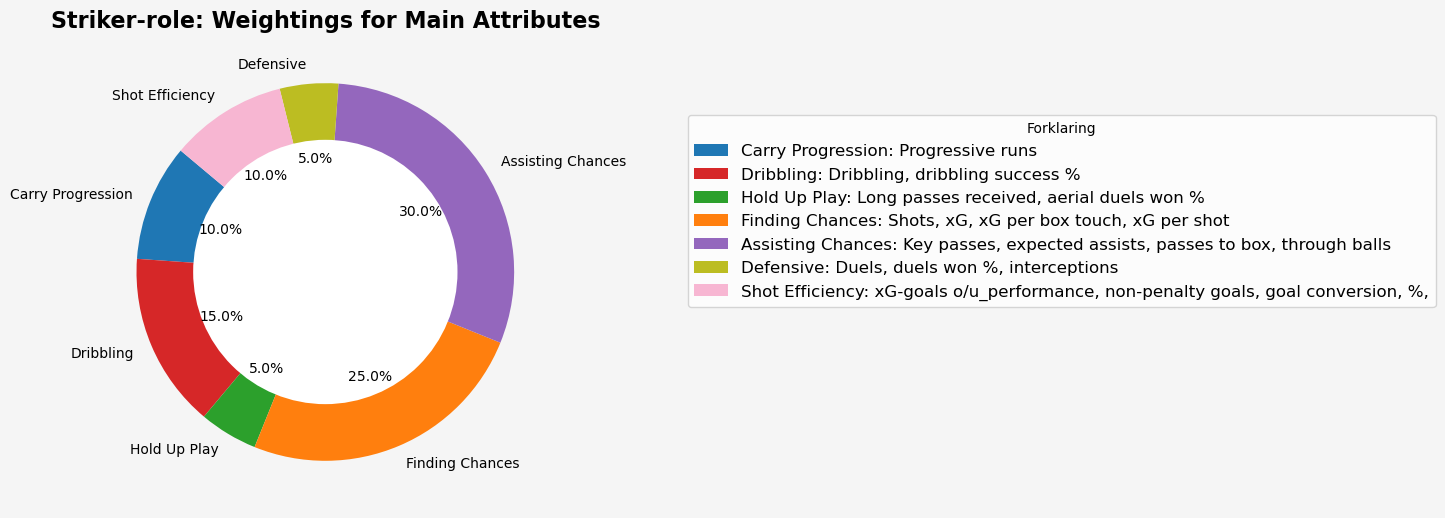

In [161]:
import matplotlib.pyplot as plt


weights = {
    "Carry Progression": 0.1,
    "Dribbling": 0.15,
    "Hold Up Play": 0.05,
    "Finding Chances": 0.25,
    "Assisting Chances": 0.3,
    "Defensive": 0.05,
    #"Aerial": 0.025,
    "Shot Efficiency": 0.1
}

descriptions = {
    "Carry Progression": "Progressive runs",
    "Dribbling": "Dribbling, dribbling success %",
    "Hold Up Play": "Long passes received, aerial duels won %",
    "Finding Chances": "Shots, xG, xG per box touch, xG per shot",
    "Assisting Chances": "Key passes, expected assists, passes to box, through balls",
    "Defensive": "Duels, duels won %, interceptions",
    #"Aerial": "Aerial duels & aerial duel win %",
    "Shot Efficiency": "xG-goals o/u_performance, non-penalty goals, goal conversion, %,"
}

# Dine hovedfarger for hver kategori
# Farger for hovedkategoriene
main_color_map = {
    "Carry Progression": "#1f77b4",  # blå
    "Dribbling": "#d62728",  # rød
    "Hold Up Play": "#2ca02c",  # grønn
    "Finding Chances": "#ff7f0e",  # oransje
    "Assisting Chances": "#9467bd",  # lilla
    "Defensive": "#bcbd22",  # gulgrønn
    #"Aerial": "#393b79",  # mørk blå-lilla
    "Shot Efficiency": "#f7b6d2"  # rosa
}

# 🎨 Bruk riktige farger i riktig rekkefølge
colors = [main_color_map[key] for key in weights.keys()]

# 📊 Tegn pie chart
fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('whitesmoke')  # eller 'lightgrey'

wedges, texts, autotexts = ax.pie(
    weights.values(),
    labels=weights.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    labeldistance=1.1
)

plt.legend(
    wedges,
    [f"{k}: {v}" for k, v in descriptions.items()],
    title="Forklaring",
    bbox_to_anchor=(1.25, 1.0),
    loc="upper left"
)
# 🕳 Donut midt
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 🏷 Tittel og forklaring
plt.title('Striker-role: Weightings for Main Attributes', fontsize=16, weight='bold')

plt.legend(
    wedges,
    [f"{k}: {v}" for k, v in descriptions.items()],
    title="Forklaring",
    bbox_to_anchor=(1.25, 0.85),  # flyttet litt ned
    loc="upper left",
    fontsize=12
)

#plt.legend(wedges, [f"{k}: {v}" for k, v in descriptions.items()],
#           title="Forklaring", bbox_to_anchor=(1.1, 1.0), loc="upper left")
# 💾 Lagre figuren som høyoppløselig bilde
plt.savefig(r"C:\Users\henri\Desktop\Fotballanalyser\Datascouting\Legia Warshawa\06-09-25ratingstruccture.jpg", dpi=400, bbox_inches="tight", transparent=True)
# 🧼 Rydd opp layouten
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


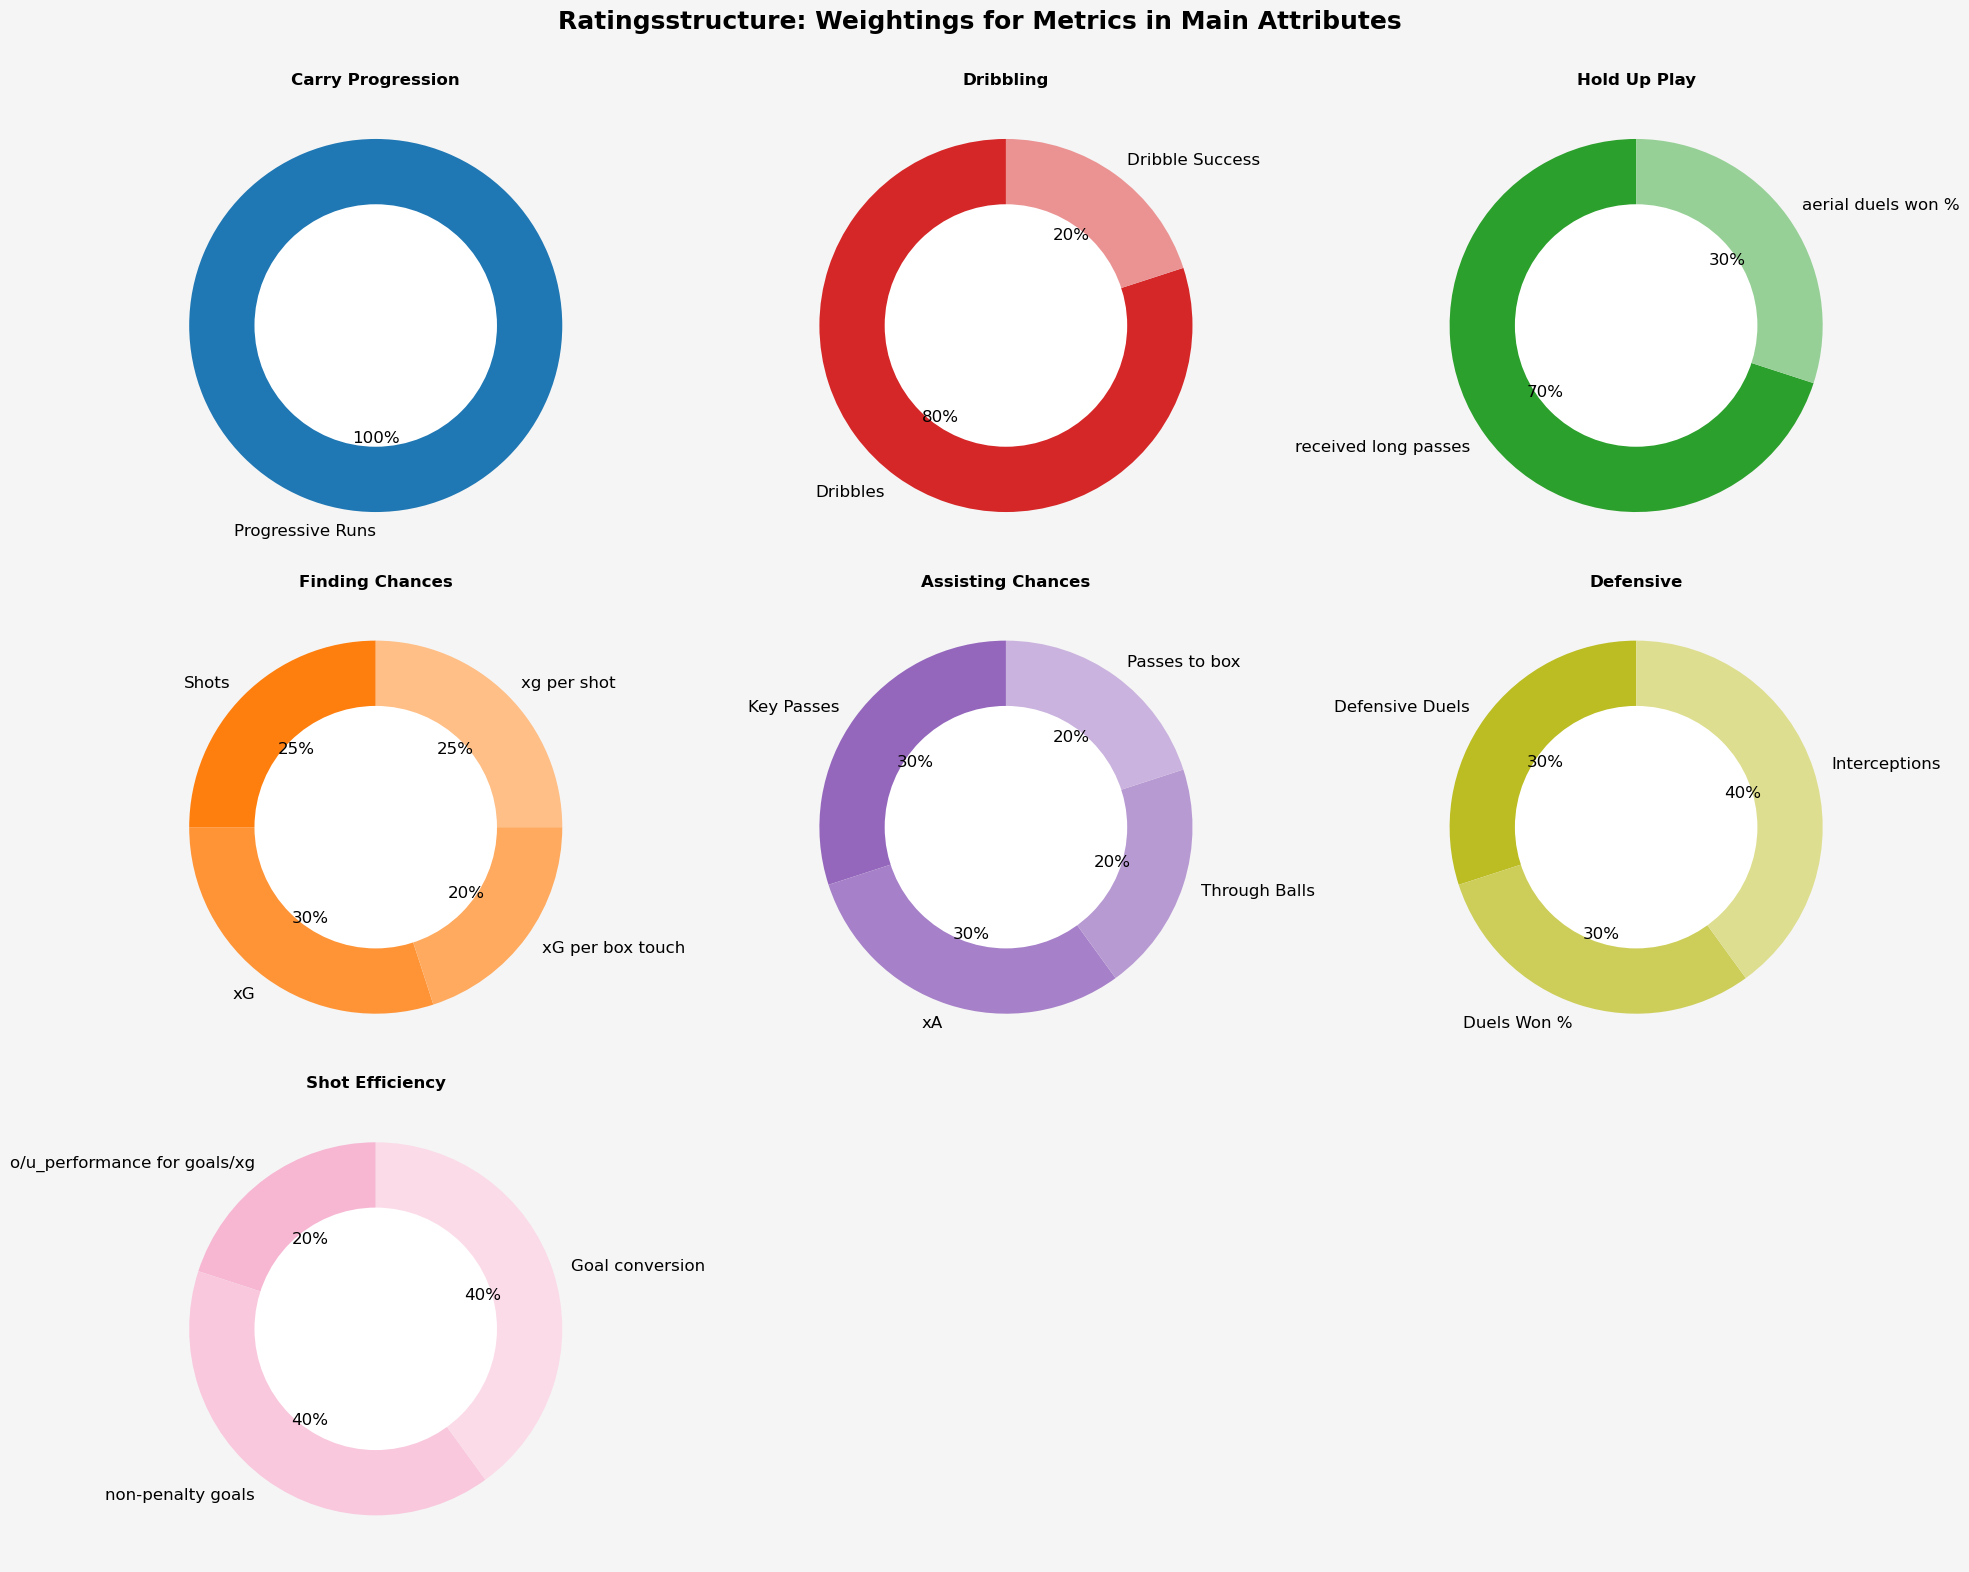

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Hovedfarger for attributtene
main_color_map = {
    "Carry Progression": "#1f77b4",  # blå
    "Dribbling": "#d62728",  # rød
    "Hold Up Play": "#2ca02c",  # grønn
    "Finding Chances": "#ff7f0e",  # oransje
    "Assisting Chances": "#9467bd",  # lilla
    "Defensive": "#bcbd22",  # gulgrønn
    #"Aerial": "#393b79",  # mørk blå-lilla
    "Shot Efficiency": "#f7b6d2"  # rosa
}

# Submetrics og vekter
attribute_details = {
    "Carry Progression": {
        "Progressive Runs": 1.0
    },
    "Dribbling": {
        "Dribbles": 0.8,
        "Dribble Success": 0.2,
    },
    "Hold Up Play": {
    "received long passes": 0.7,
    "aerial duels won %": 0.3
    },
    "Finding Chances": {
        "Shots": 0.25,
        "xG": 0.3,
        "xG per box touch": 0.2,
        "xg per shot":0.25,
    },
    "Assisting Chances": {
        "Key Passes": 0.3,
        "xA": 0.3,
        "Through Balls": 0.2,
        "Passes to box": 0.2,
    },
    "Defensive": {
        "Defensive Duels": 0.3,
        "Duels Won %": 0.3,
        "Interceptions": 0.4
    },
   # "Aerial": {
   #     "Aerial Duels": 0.5,
   #     "Aerial Win %": 0.5
   # },
    "Shot Efficiency": {
        "o/u_performance for goals/xg":0.2,
        "non-penalty goals":0.4,
        "Goal conversion":0.4,
    }
}

# Funksjon for å generere nyanser av en basefarge
def generate_shades(base_color, n):
    base = mcolors.to_rgb(base_color)
    return [mcolors.to_hex([(1 - i) * c + i * 1.0 for c in base]) for i in np.linspace(0, 0.5, n)]

# Plotting
n = len(attribute_details)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
fig.patch.set_facecolor('whitesmoke')  # eller 'lightgrey'
axes = axes.flatten()

for idx, (attribute, submetrics) in enumerate(attribute_details.items()):
    ax = axes[idx]
    sizes = list(submetrics.values())
    labels = list(submetrics.keys())
    
    # Bruk nyanser av hovedfargen
    main_color = main_color_map[attribute]
    colors = generate_shades(main_color, len(labels))

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.0f%%',
        startangle=90,
        textprops={'fontsize': 12}
    )

    centre_circle = plt.Circle((0, 0), 0.65, fc='white')
    ax.add_artist(centre_circle)
    ax.set_title(attribute, fontsize=12, weight='bold')

# Fjern eventuelle tomme plot
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# 📌 Gi plass til tittel øverst uten overlapp
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Ratingsstructure: Weightings for Metrics in Main Attributes", fontsize=18, weight='bold')
# 💾 Lagre figuren som høyoppløselig bilde
plt.savefig(r"C:\Users\henri\Desktop\Fotballanalyser\Datascouting\Legia Warshawa\ratingstruccture-weightings-06.09-25.jpg", dpi=400, bbox_inches="tight", transparent=True)

plt.show()


In [221]:
ratings.columns

Index(['player', 'squad', 'age', 'market value', 'minutes played',
       'contract months left', 'league', 'carry_att', 'dribble_att',
       'hold_up_play_att', 'finding_chances_att', 'shot_efficiency_att',
       'assisting_chances_att', 'defensive_att', 'Carry Progression',
       'Dribbling', 'Hold Up Play', 'Finding Chances', 'Assisting Chances',
       'Defensive Contribution', 'Shot Efficiency', 'Raw Total Score',
       'Final Rating'],
      dtype='object')

In [225]:
ratings.head()

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score,Final Rating
1,Isra Suero,Castellón,31,200000,2564,0,Spain Segunda 2024-25,29.89,36.33,32.90,42.94,63.43,59.95,68.09,2.99,5.45,1.65,10.73,17.99,3.40,6.34,48.55,100.00
2,B. Raman,Mechelen,30,1300000,1551,9,Belgium First Division A 2024-25,18.62,32.79,43.83,60.59,78.42,36.17,29.73,1.86,4.92,2.19,15.15,10.85,1.49,7.84,44.30,98.92
3,L. Suárez,Almería,27,3500000,3984,45,Spain Segunda 2024-25,46.21,51.11,39.31,66.71,51.92,30.84,37.30,4.62,7.67,1.97,16.68,9.25,1.86,5.19,47.24,98.87
4,T. Adamsen,Silkeborg,30,900000,2837,9,Denmark Superliga 2024-25,48.97,41.84,41.15,49.65,47.29,58.11,28.43,4.90,6.28,2.06,12.41,17.43,1.42,4.73,49.23,97.82
5,K. Denkey,Cercle Brugge,24,16000000,1460,9,Belgium First Division A 2024-25,25.52,38.63,29.03,61.22,61.63,27.62,40.63,2.55,5.79,1.45,15.30,8.29,2.03,6.16,41.58,96.57


In [ ]:
print(f"Difference in unadjusted score from Twelve model:")
print(f"test ekstraklasa inkludert blelgiuem:{0.600-0.493}") 
print(f"ekstraklasa player: {0.439-0.332}") # Finland 0.426	0.319
print(f"polan 1.div player: {0.119-0.525}") # superettan
print(f"poland 1. divission:{-0.511-0.252}")
print(f"Bundesliga 2 player: {0.560-0.887}") # obos
print(f"Denamrk player: {1.396-1.187}") # 2. div 
print(f"Sweden player: {1.00-0.787}") # Island
print(f"Czech player: {0.453-0.393}") # Finland
print(f"Ligue 2 player: {1.142-1.056}") # superettan
print(f"Serie B player: {1.198-1.056}") # obos
print(f"HNL player: {1.206-1.294}") # 2. div
print(f"Serbia player: {1.048-0.963}") # Island
print(f"Slovenia player: {0.914-1.088}") # Island
print(f"Slovakia player: {0.434-0.645}") # Finland
print(f"Austria player: {1.019-0.885}") # superettan
print(f"Switserland player: {0.646-0.560}") # obos
print(f"Portugal segunda player: {0.289-0.263}") # 2. div
print(f"Spain segunda player: {1.172-0.927}") # Island
print(f"spain segunda player: {1.164-0.919}")
print(f"Greece player: {0.698-0.579}") # obos
print(f"Belgieum first div player: {0.955-0.684}") # 2. div
print(0.956-0.685)
print(f"Belgium second div player: {0.789-0.871}") # Island
print(f"Finland player: {0.347-0.787}") # Island 
print(f"Holland player: {0.644-0.779}")
print(f"japan player: {0.976-0.989}") 
#Note:The numbers are collected from comparing players from different league in Twelve earpiece. 

C:\Users\henri\AppData\Local\Temp\ipykernel_46732\143702420.py:193: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdYlGn")


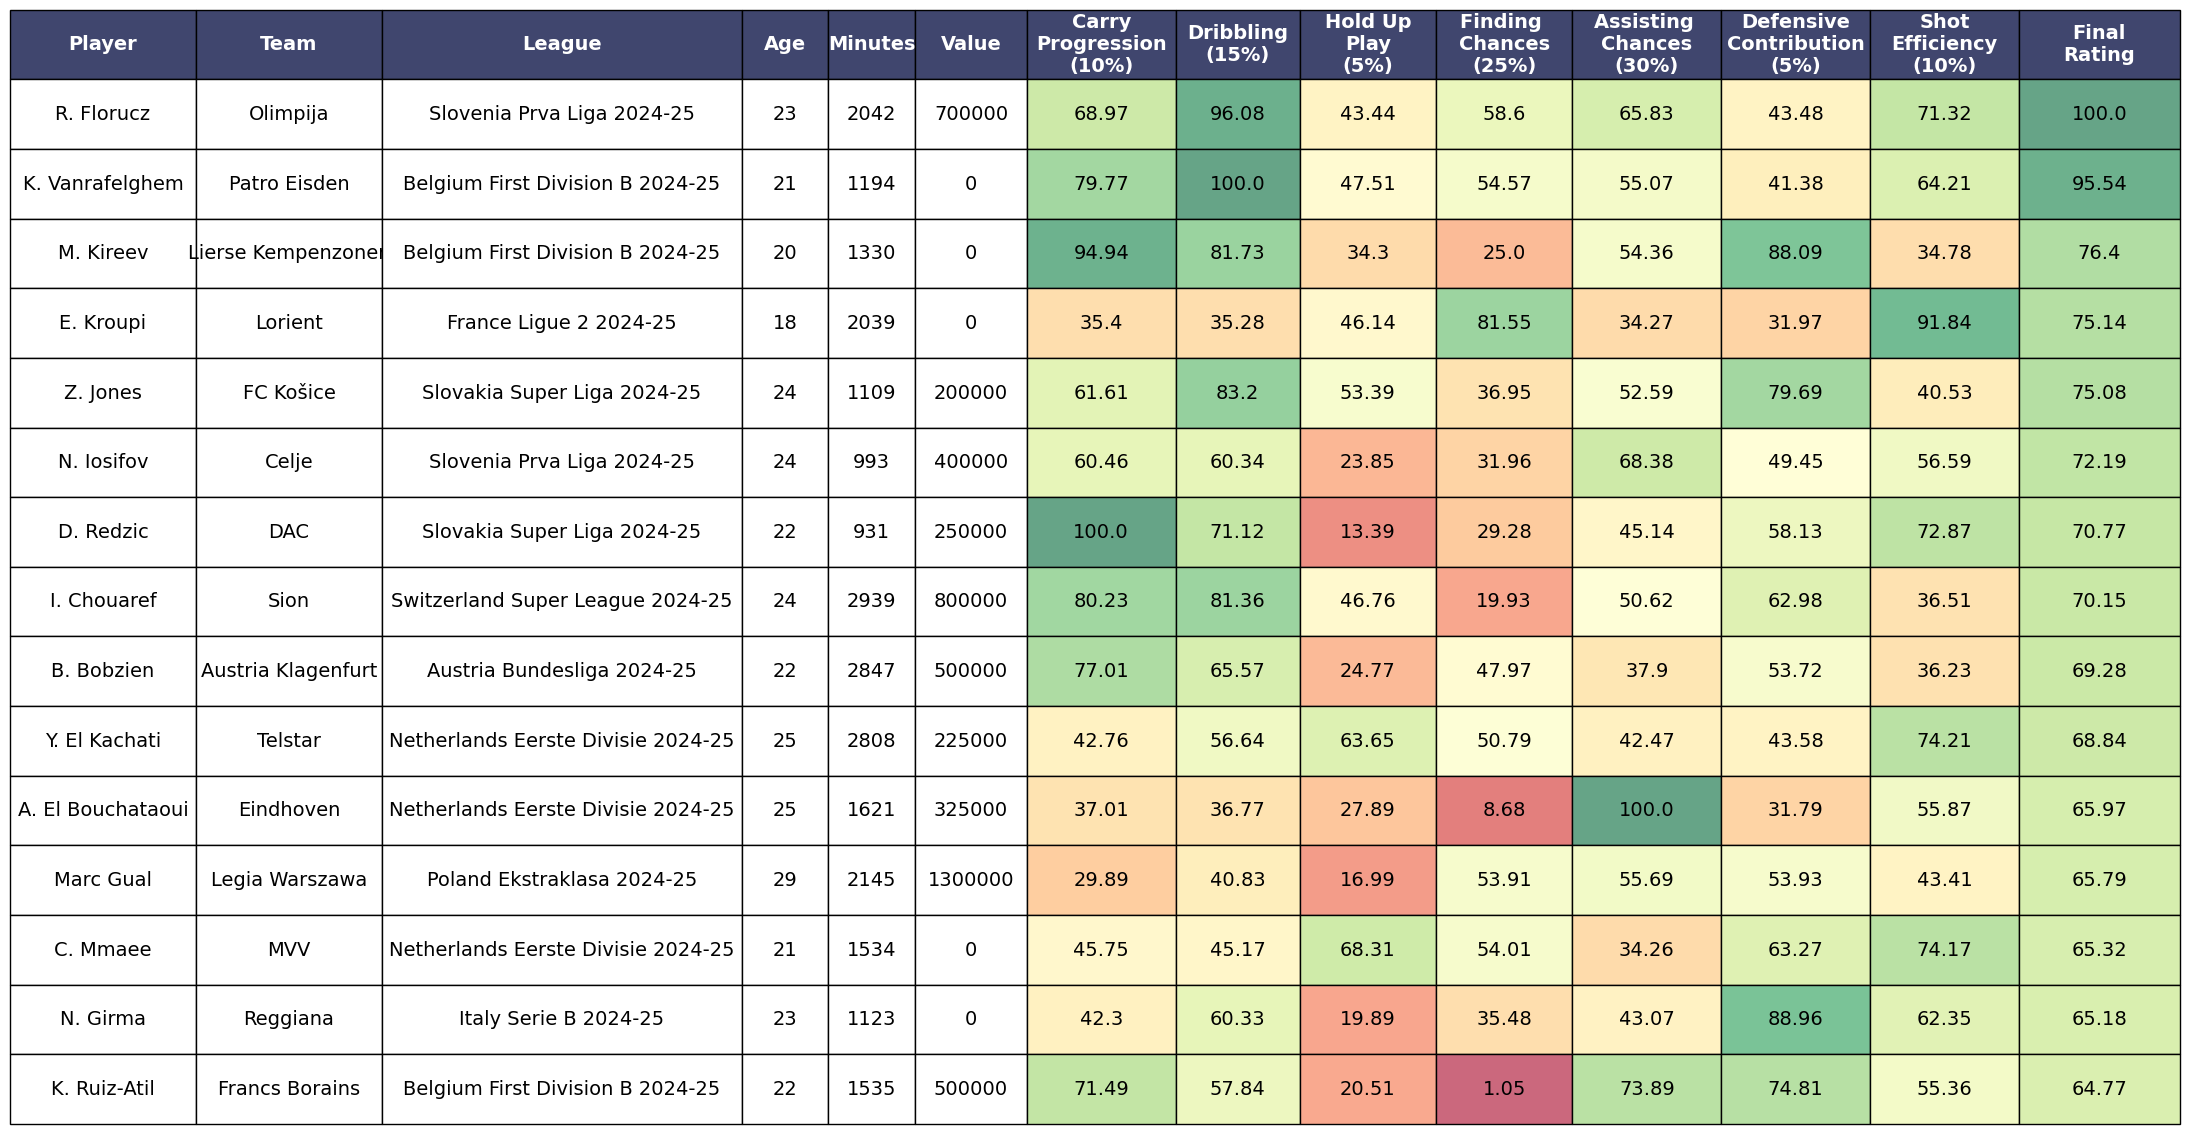

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

class TopPlayersTable:
    def __init__(self, df, columns_to_rating, weights=None, max_age=None, max_value=None,
                 min_minutes=None, exclude_teams=None, exclude_players=None,
                 include_players=None, save_path=None):
        self.df = df.copy()
        self.columns_to_rating = columns_to_rating
        self.weights = weights or {}
        self.max_age = max_age
        self.max_value = max_value
        self.min_minutes = min_minutes
        self.exclude_teams = exclude_teams or []
        self.exclude_players = exclude_players or []
        self.include_players = include_players or []
        self.save_path = save_path

        # --- Display-navn ---
        self.col_label_display_names = {
            'Player': 'Player',
            'Squad': 'Team',
            'League': 'League',
            'Age': 'Age',
            'Minutes Played': 'Minutes',
            'Market Value': 'Value',
            'Carry Progression': 'Carry\nProgression',
            'Dribbling': 'Dribbling',
            'Hold Up Play': 'Hold Up\nPlay',
            'Finding Chances': 'Finding \nChances', 
            'Assisting Chances': 'Assisting \nChances',
            'Shot Efficiency': 'Shot\nEfficiency',
            'Defensive Contribution': 'Defensive\nContribution',
            'Final Rating': 'Final\nRating',
        }

        # --- Kolonnebredder ---
        self.desired_widths = {
            'Player': 0.15,
            'Team': 0.15,
            'League': 0.29,
            'Age': 0.07,
            'Minutes': 0.07,
            'Value': 0.09,
            'Final\nRating': 0.13,
            'Carry\nProgression': 0.12,
            'Dribbling': 0.10,
            'Hold Up\nPlay': 0.11,
            'Finding \nChances': 0.11,
            'Assisting \nChances': 0.12,
            'Shot\nEfficiency': 0.12,
            'Defensive\nContribution': 0.12,
        }

    def _standardize_columns(self, df):
        """Standardiser til Title Case for konsistens."""
        return df.rename(columns={col: col.title() for col in df.columns})

    @staticmethod
    def normalize_data(data):
        """Normaliser data til [0, 1]-område"""
        if np.ptp(data) == 0:
            return np.zeros_like(data, dtype=float)
        return (data - np.min(data)) / np.ptp(data)

    def generate_table(self, n_players=20):
        # --- 1. Filtrering ---
        filtered = self.df.copy()
        
        if self.exclude_teams:
            filtered = filtered[~filtered['squad'].isin(self.exclude_teams)]
        if self.exclude_players:
            filtered = filtered[~filtered['player'].isin(self.exclude_players)]
        if self.max_age:
            filtered = filtered[filtered['age'] <= self.max_age]
        if self.max_value:
            filtered = filtered[filtered['market value'] <= self.max_value]
        if self.min_minutes:
            filtered = filtered[filtered['minutes played'] >= self.min_minutes]
        
        # Legg alltid tilbake include_players
        include_players_df = self.df[self.df['player'].isin(self.include_players)].copy()
        filtered = pd.concat([filtered, include_players_df]).drop_duplicates(subset=['player'])
        
        # --- 2. Beregn raw_total_z-score ---
        filtered['raw_total_z-score'] = (
            (filtered['Raw Total Score'] - filtered['Raw Total Score'].mean()) 
            / filtered['Raw Total Score'].std()
        )
        
        # --- 3. League-justering ---
        league_adjustments = {
            'Slovakia Super Liga 2024-25': -0.211, 
            'Greece Super League 2024-25': 0.119,
            'Netherlands Eerste Divisie 2024-25': -0.135, 
            'Sweden Allsvenskan 2025': 0.21,
            'Croatia 1.HNL 2024-25': -0.09, 
            'Belgium First Division B 2024-25': -0.08,
            'Switzerland Super League 2024-25': 0.08,
            'France Ligue 2 2024-25': 0.08,
            'Finland Veikkausliiga 2025': -0.44, 
            'Denmark Superliga 2024-25': 0.208,
            'Czech Fortuna Liga 2024-25': 0.06, 
            'Austria Bundesliga 2024-25': 0.13,
            'Germany 2. Bundesliga 2024-25': -0.326,
            'Poland Ekstraklasa 2024-25': 0.107,
            'Poland 1 Liga 2024-25': -0.606, 
            'Spain Segunda 2024-25': 0.24,
            'Italy Serie B 2024-25': 0.14,
            'Belgium First Division A 2024-25': 0.27,
            'Slovenia Prva Liga 2024-25': -0.17, 
            'Serbia Super Liga 2024-25': 0.08,
            'Japan J1-League 2025': 0.094,
        }
        filtered['raw_total_z-score'] += filtered['league'].map(league_adjustments).fillna(0)

        # --- 4. Lag Final Rating normalisert 0-100 ---
        filtered['Final Rating'] = self.normalize_data(filtered['raw_total_z-score']) * 100

        # --- 5. Normaliser øvrige rating-kolonner 0-100 ---
        for col in self.columns_to_rating:
            if col != 'Final Rating' and col in filtered.columns:
                filtered[col] = self.normalize_data(filtered[col]) * 100

        # --- 6. Velg kolonner for visning ---
        base_cols = ['player', 'squad', 'league', 'age', 'minutes played', 'market value']
        selected_cols = base_cols + self.columns_to_rating
        top_df = filtered[selected_cols].copy()

        # --- Rund alle numeriske kolonner til 2 desimaler ---
        num_cols = top_df.select_dtypes(include=np.number).columns
        top_df[num_cols] = top_df[num_cols].round(2)
        # Standardiser kolonnenavn
        top_df = self._standardize_columns(top_df)
        col_display = [self.col_label_display_names.get(c, c) for c in top_df.columns]
        top_df.columns = col_display

        rating_cols = [c for c in top_df.columns if c not in ['Player','Team','League','Age','Minutes','Value']]

        # --- 7. Sorter top n spillere + include_players ---
        sorted_idx = top_df["Final\nRating"].sort_values(ascending=False).index
        top_idx = sorted_idx[:n_players]
        include_idx = top_df[top_df['Player'].isin(self.include_players)].index
        final_idx = pd.Index(top_idx).union(include_idx)
        top_df = top_df.loc[final_idx]
        sort_order = top_df["Final\nRating"].sort_values(ascending=False).index
        top_df = top_df.loc[sort_order]

        # --- 8. Visualiser tabell ---
        if len(top_df) == 0:
            print("Ingen spillere funnet som matcher kriteriene.")
            return pd.DataFrame()

        row_height, header_height = 0.4, 0.3
        total_height = row_height * (len(top_df) + 1) + header_height
        fig, ax = plt.subplots(figsize=(16, total_height))
        ax.axis('off')

        col_widths = [self.desired_widths.get(c, 0.10) for c in top_df.columns]

        weighted_col_labels = []
        for col in top_df.columns:
            original_col_name = [k for k, v in self.col_label_display_names.items() if v == col]
            if original_col_name and original_col_name[0] in self.weights:
                weight = self.weights[original_col_name[0]] * 100
                weighted_col_labels.append(f"{col}\n({weight:.0f}%)")
            else:
                weighted_col_labels.append(col)

        table = ax.table(
            cellText=top_df.values,
            colLabels=weighted_col_labels,
            colWidths=col_widths,
            cellLoc='center',
            loc='center'
        )

        # Header
        for j in range(len(top_df.columns)):
            table[(0, j)].set_facecolor("#40466e")
            table[(0, j)].set_text_props(color="white", weight="bold", size=14)
            table[(0, j)].set_height(0.10)

        # Celler
        for key, cell in table.get_celld().items():
            cell.set_height(0.09)
            if key[0] > 0:
                cell.set_text_props(size=14, color="black")

        # Fargeskala
        cmap = cm.get_cmap("RdYlGn")
        def lighten(color, factor=0.5):
            return tuple(1 - factor * (1 - c) for c in color)

        for i in range(len(top_df)):
            for j, col in enumerate(top_df.columns):
                if col in rating_cols:
                    val_norm = top_df.iloc[i][col] / 100
                    base_color = cmap(val_norm)
                    light_color = lighten(base_color, factor=0.6)
                    table[(i + 1, j)].set_facecolor(light_color)

        table.auto_set_font_size(False)
        table.scale(1, 1.5)

        if self.save_path:
            plt.savefig(self.save_path, bbox_inches="tight", pad_inches=0, dpi=400)

        plt.show()
        return top_df




weights = {
    "Carry Progression": 0.1,
    "Dribbling": 0.15,
    "Hold Up Play": 0.05,
    "Finding Chances": 0.25,
    "Assisting Chances": 0.3,
    "Defensive Contribution": 0.05,
    "Shot Efficiency": 0.1
}

columns_to_rating = [
    'Carry Progression', 'Dribbling', 'Hold Up Play', 'Finding Chances', 
    'Assisting Chances', 'Defensive Contribution', 'Shot Efficiency', 
    'Final Rating'
]

generator = TopPlayersTable(
    df=ratings,
    columns_to_rating=columns_to_rating,
    weights=weights,
    max_age=27,
    max_value=1500000,
    min_minutes=900,
    exclude_teams=['Club Brugge','Mjällby', 'Union Saint-Gilloise', 'Midtjylland', 'Anderlecht','AEK Athens','Genk','Antwerp', 'Slavia Praha','Olympiacos Piraeus','PAOK','Raków Częstochowa','Sparta Praha','Crvena Zvezda','København','Dinamo Zagreb','Malmö FF','Viktoria Plzeň'],         # Fjern tomme strenger hvis ikke ønsket
    exclude_players=[''],       # Fjern tomme strenger hvis ikke ønsket
    include_players=['Marc Gual'],
    save_path= r"C:\Users\henri\Desktop\Fotballanalyser\Datascouting\Legia Warshawa\playerating-top15---08-09-25.jpg"   # hvis ønskelig
)

result_df = generator.generate_table(n_players=15)


In [103]:
ratings[ratings['player']=='Marc Gual']

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score
3689,Marc Gual,Legia Warszawa,29,1300000,2145,9,Poland Ekstraklasa 2024-25,0.298851,0.408324,0.157857,0.539129,0.372203,0.530724,0.544569,0.029885,0.061249,0.007893,0.134782,0.159217,0.027228,0.03722,0.457475


In [154]:
ratings.columns

Index(['player', 'squad', 'age', 'market value', 'minutes played',
       'contract months left', 'league', 'carry_att', 'dribble_att',
       'hold_up_play_att', 'finding_chances_att', 'shot_efficiency_att',
       'assisting_chances_att', 'defensive_att', 'Carry Progression',
       'Dribbling', 'Hold Up Play', 'Finding Chances', 'Assisting Chances',
       'Defensive Contribution', 'Shot Efficiency', 'Raw Total Score',
       'raw_total_z-score', 'Final Rating'],
      dtype='object')

In [156]:
ratings.head()

,player,squad,age,market value,minutes played,contract months left,league,carry_att,dribble_att,hold_up_play_att,finding_chances_att,shot_efficiency_att,assisting_chances_att,defensive_att,Carry Progression,Dribbling,Hold Up Play,Finding Chances,Assisting Chances,Defensive Contribution,Shot Efficiency,Raw Total Score,raw_total_z-score,Final Rating
1,R. Florucz,Olimpija,23,700000,2042,32,Slovenia Prva Liga 2024-25,68.97,96.66,43.56,60.57,70.01,66.74,44.97,6.90,14.50,2.18,15.14,20.02,2.25,7.00,67.99,4.299452,1.0000
2,K. Vanrafelghem,Patro Eisden,21,0,1194,33,Belgium First Division B 2024-25,79.77,100.00,47.19,56.46,63.23,55.96,42.85,7.98,15.00,2.36,14.12,16.79,2.14,6.32,64.71,3.887945,0.9512
3,E. Kroupi,Lorient,18,0,2039,57,France Ligue 2 2024-25,35.40,37.48,46.58,82.94,91.34,34.36,34.01,3.54,5.62,2.33,20.74,10.31,1.70,9.13,53.37,2.466529,0.7598
4,M. Kireev,Lierse Kempenzonen,20,0,1330,21,Belgium First Division B 2024-25,94.94,82.49,34.82,26.57,33.81,55.26,87.95,9.49,12.37,1.74,6.64,16.58,4.40,3.38,54.60,2.621285,0.7590
5,Z. Jones,FC Košice,24,200000,1109,0,Slovakia Super Liga 2024-25,61.61,84.12,52.93,36.98,40.50,53.43,79.83,6.16,12.62,2.65,9.24,16.03,3.99,4.05,54.74,2.638551,0.7418


In [97]:
result_df.head()

,Player,Team,League,Age,Minutes,Value,Carry\nProgression,Dribbling,Hold Up\nPlay,Finding \nChances,Assisting \nChances,Defensive\nContribution,Shot\nEfficiency,Final\nRating
5482,R. Florucz,Olimpija,Slovenia Prva Liga 2024-25,23,2042,700000,68.97,96.08,43.44,58.60,65.83,43.48,71.32,100.00
1421,K. Vanrafelghem,Patro Eisden,Belgium First Division B 2024-25,21,1194,0,79.77,100.00,47.51,54.57,55.07,41.38,64.21,95.54
1397,M. Kireev,Lierse Kempenzonen,Belgium First Division B 2024-25,20,1330,0,94.94,81.73,34.30,25.00,54.36,88.09,34.78,76.41
1872,E. Kroupi,Lorient,France Ligue 2 2024-25,18,2039,0,35.40,35.28,46.14,81.55,34.27,31.97,91.84,75.15
169,Z. Jones,FC Košice,Slovakia Super Liga 2024-25,24,1109,200000,61.61,83.20,53.39,36.95,52.59,79.69,40.53,75.07
